# 
**TP3: Ladybug Trajectory Prediction**

- Binôme 1:
- Binôme 2:

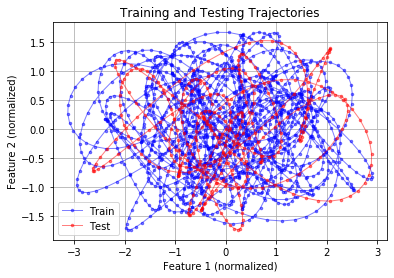


`Objectives`: Build neural networks for multi step time series forecasting.

1. Build `Transformer`/``RNN``/``LSTM``/``GRU``/``MLP`` model(s).
2. Adapt it/them for multistep time series forecasting Memory order $L=20$ and prediction horizon $T=20$
3. Split dataset to train and test set for the ladybug trajectory dataset.
4. Build `Experiment` for training and testing the time series model.
5. Compare performance of different models.
6. (Optional): Implement a simplified version of Reversible Instance Normalization, examine its performance.
7. Make a **conclusion** with experiments results.

**Remark**: Do not generate too many graphs and text, make sure your notebook is clean and readable.


In [1]:
import numpy as np
from math import cos, sin
import random

### Initialization with ladybug_init(s)
The ladybug_init function initializes the parameters for the ladybug's movement. It takes an optional seed value s for the random number generator to ensure reproducibility of the simulation. If s is greater than zero, the seed is set, ensuring that the random numbers generated are the same for each run with the same seed. The function then creates two lists, params_x and params_y, each containing 8 parameters drawn from a Gaussian (normal) distribution with a mean of 0 and a standard deviation of 1. These parameters (ax1 to ax4, kx1 to kx4 for the x direction, and similarly ay1 to ay4, ky1 to ky4 for the y direction) influence the oscillatory motion of the ladybug in both the x and y directions, respectively.

### Movement Simulation with ladybug_move(t)
The ladybug_move function calculates the ladybug's position (x, y) at a given time t. It retrieves the previously initialized parameters for the x and y directions. The position of the ladybug at time t is determined by a combination of sinusoidal and cosinusoidal functions, which are commonly used to model periodic or oscillatory motions. Specifically, the x-coordinate is calculated as a sum of:

sine and cosine functions of t, scaled by parameters that adjust the frequency (kx1 to kx4 with added constants to ensure non-zero frequencies) and amplitude (ax1 to ax4).
The y-coordinate is similarly calculated but with its own set of parameters (ay1 to ay4 for amplitude and ky1 to ky4 for frequency) and a mix of sine and cosine functions.



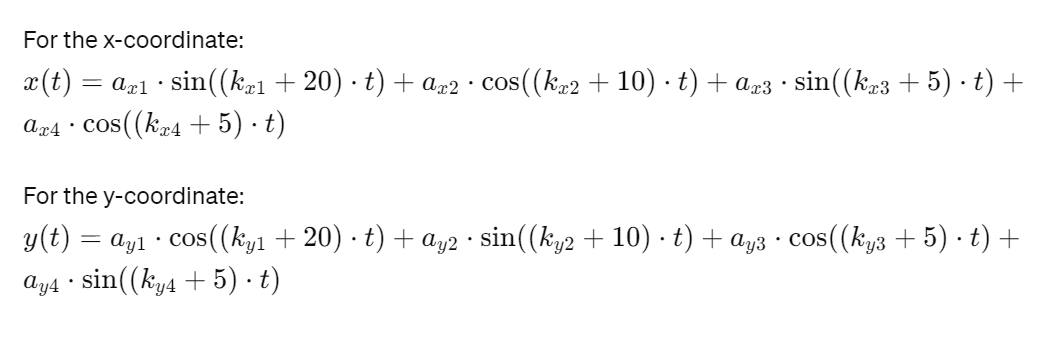


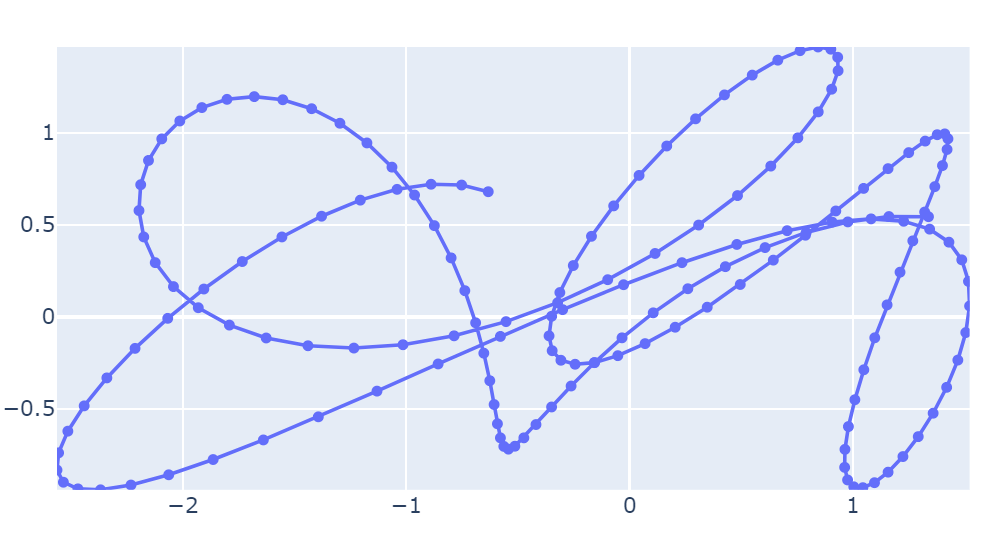

In [4]:
def ladybug_init(s=122):
    
    if s>0 : random.seed(s)
    ladybug_init.params_x = [ random.gauss(0.,1.) for u in range(8)]
    ladybug_init.params_y = [ random.gauss(0.,1.) for u in range(8)]
    
def ladybug_move(t):

    [ax1, ax2, ax3, ax4, kx1, kx2, kx3, kx4] = ladybug_init.params_x
    [ay1, ay2, ay3, ay4, ky1, ky2, ky3, ky4] = ladybug_init.params_y
    
    x = ax1*sin(t*(kx1+20)) + ax2*cos(t*(kx2+10)) + ax3*sin(t*(kx3+5)) + ax4*cos(t*(kx4+5))
    y = ay1*cos(t*(ky1+20)) + ay2*sin(t*(ky2+10)) + ay3*cos(t*(ky3+5)) + ay4*sin(t*(ky4+5)) 

    return x,y

### Datasets
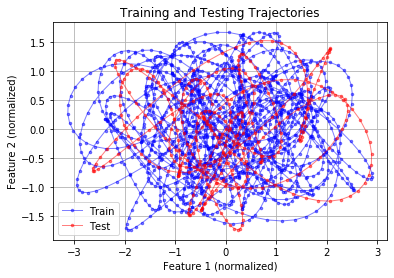

**Parameters for lady bug simulation**


In [ ]:
# ---- About dataset ----------------#
max_t        = 100
delta_t      = 0.01
features_len = 2


sequence_len = 20
predict_len  = 5

# ---- About training ---------------#
scale         = .2       # Percentage of dataset to be used (1=all)
train_prop    = .8       # Percentage for train (the rest being for the test)
batch_size    = 32
epochs        = 5
fit_verbosity = 1        # 0 = silent, 1 = progress bar, 2 = one line per epoch

In [97]:
# ---- Get positions
#
ladybug_init(s=16)
x,y = 0,0
positions=[]
for t in np.arange(0., max_t, delta_t):
    x,y = ladybug_move(t)
    positions.append([x,y])

# ---- Build rescaled dataset
#
n = int( len(positions)*scale )
dataset = np.array(positions[:n])

k = int(len(dataset)*train_prop)
x_train = dataset[:k]
x_test  = dataset[k:]

# ---- Normalize
#
mean = x_train.mean()
std  = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

print("Dataset generated.")
print("Train shape is : ", x_train.shape)
print("Test  shape is : ", x_test.shape)

Dataset generated.
Train shape is :  (1600, 2)
Test  shape is :  (400, 2)


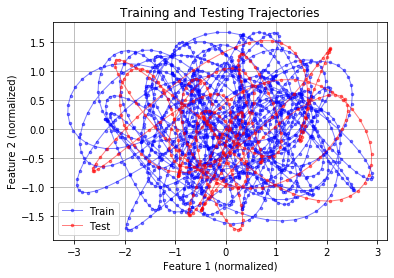

In [ ]:
import matplotlib.pyplot as plt

# Plot training data points as a line
plt.plot(x_train[:, 0], x_train[:, 1], c='blue', label='Train', marker='.', markersize=5, linestyle='-', linewidth=1, alpha=0.5)

# Plot testing data points as a line
plt.plot(x_test[:, 0], x_test[:, 1], c='red', label='Test', marker='.', markersize=5, linestyle='-', linewidth=1, alpha=0.5)

# Label the axes, add a legend, and show the plot
plt.xlabel('Feature 1 (normalized)')
plt.ylabel('Feature 2 (normalized)')
plt.title('Training and Testing Trajectories')
plt.legend()
plt.grid(True)
plt.show()


### Models


### Experiments 

### Results 

### Conclusion